# Validation

In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import json
import numpy as np
from loaddata import *
from mapping import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df_annotations, df_categories, df_images = loaddata()

In [3]:
results = pd.read_csv("topk_ids.csv", header=None)

In [4]:
m = Mapping()

In [5]:
df_categories[df_categories["category_id"] == 15]

,category_id,name
12,15,eira barbara


In [6]:
PATH = "imagenet/train/"

In [7]:
results.head(10)

,0,1,2,3,4,5
0,8a0aa65a-21bc-11ea-a13a-137349068a90_1.jpg,38,34,45,29,56
1,8a0aa65a-21bc-11ea-a13a-137349068a90_2.jpg,38,34,45,0,29
2,8a00acc2-21bc-11ea-a13a-137349068a90_1.jpg,163,164,120,58,15
3,8a0bc8b4-21bc-11ea-a13a-137349068a90_1.jpg,38,34,50,29,32
4,8a0bc8b4-21bc-11ea-a13a-137349068a90_2.jpg,38,50,34,32,29
5,8a0bc8b4-21bc-11ea-a13a-137349068a90_3.jpg,50,38,104,56,54
6,8a0bcf4e-21bc-11ea-a13a-137349068a90_1.jpg,163,58,106,164,17
7,8a0c93ac-21bc-11ea-a13a-137349068a90_1.jpg,44,55,85,10,132
8,8a0c415e-21bc-11ea-a13a-137349068a90_1.jpg,54,48,165,67,162
9,8a0cad2e-21bc-11ea-a13a-137349068a90_1.jpg,172,162,163,164,15


In [8]:
filename, result = results.iloc[5][0], int(results.iloc[5][1])
print(result)
print(m.reverse(m(result)))

50
50


In [9]:
df_annotations.head()

,id,image_id,category_id
0,a292dd3c-21bc-11ea-a13a-137349068a90,96b00332-21bc-11ea-a13a-137349068a90,73
1,a0afcfc0-21bc-11ea-a13a-137349068a90,879d74d8-21bc-11ea-a13a-137349068a90,4
2,a306e9c0-21bc-11ea-a13a-137349068a90,9017f7aa-21bc-11ea-a13a-137349068a90,227
3,9eed94c4-21bc-11ea-a13a-137349068a90,90d93c58-21bc-11ea-a13a-137349068a90,250
4,a2a4dd7a-21bc-11ea-a13a-137349068a90,887cd0ec-21bc-11ea-a13a-137349068a90,2


In [10]:
def get_gt(filename):
    filename = filename.split("_")[0]
    return int(df_annotations[df_annotations["image_id"] == filename]["category_id"])

In [11]:
matrix = np.zeros((205,205))

In [12]:
def match(filename, answer):
    gt_cat_id = m.reverse(get_gt(filename))
    res_cat_id = answer
    matrix[gt_cat_id][res_cat_id] += 1
    return gt_cat_id == res_cat_id

In [13]:
matrix = np.zeros((205,205))
for i, row in results.iterrows():
    filename, result = row[0], int(row[1])
    match(filename,result)

In [14]:
def most_confused():
    maps = {}
    errors = 0
    for i in range(205):
        for j in range(205):
            if i != j:
                if matrix[i][j] > 0:
                    tp = (i,j)
                    if not tp in maps:
                        maps[tp] = 0
                    maps[tp] += 1
                    errors += 1
    print(errors)
    return maps

In [15]:
maps = most_confused()

561


In [16]:
print(maps)

{(0, 1): 1, (0, 2): 1, (0, 24): 1, (0, 29): 1, (0, 41): 1, (0, 42): 1, (0, 49): 1, (0, 54): 1, (0, 72): 1, (0, 73): 1, (0, 81): 1, (0, 98): 1, (0, 106): 1, (0, 107): 1, (0, 118): 1, (0, 124): 1, (0, 125): 1, (0, 162): 1, (1, 2): 1, (1, 4): 1, (1, 6): 1, (1, 12): 1, (1, 17): 1, (1, 41): 1, (1, 55): 1, (1, 61): 1, (1, 96): 1, (1, 99): 1, (1, 132): 1, (1, 162): 1, (1, 163): 1, (1, 164): 1, (1, 166): 1, (1, 168): 1, (1, 169): 1, (1, 170): 1, (1, 172): 1, (1, 173): 1, (2, 1): 1, (2, 4): 1, (2, 6): 1, (2, 9): 1, (2, 17): 1, (2, 35): 1, (2, 98): 1, (2, 99): 1, (2, 130): 1, (2, 132): 1, (2, 170): 1, (2, 195): 1, (2, 200): 1, (3, 93): 1, (4, 15): 1, (4, 20): 1, (4, 39): 1, (4, 49): 1, (4, 96): 1, (4, 107): 1, (4, 128): 1, (4, 161): 1, (4, 162): 1, (4, 163): 1, (4, 164): 1, (4, 166): 1, (4, 167): 1, (4, 168): 1, (4, 169): 1, (4, 170): 1, (4, 173): 1, (4, 194): 1, (4, 202): 1, (5, 71): 1, (6, 1): 1, (6, 131): 1, (6, 168): 1, (8, 0): 1, (8, 1): 1, (8, 6): 1, (8, 15): 1, (8, 20): 1, (8, 39): 1, (8,

In [17]:
maps =  {k: v for k, v in sorted(maps.items(), reverse=True, key=lambda item: item[1])}

In [18]:
print(maps)

{(0, 1): 1, (0, 2): 1, (0, 24): 1, (0, 29): 1, (0, 41): 1, (0, 42): 1, (0, 49): 1, (0, 54): 1, (0, 72): 1, (0, 73): 1, (0, 81): 1, (0, 98): 1, (0, 106): 1, (0, 107): 1, (0, 118): 1, (0, 124): 1, (0, 125): 1, (0, 162): 1, (1, 2): 1, (1, 4): 1, (1, 6): 1, (1, 12): 1, (1, 17): 1, (1, 41): 1, (1, 55): 1, (1, 61): 1, (1, 96): 1, (1, 99): 1, (1, 132): 1, (1, 162): 1, (1, 163): 1, (1, 164): 1, (1, 166): 1, (1, 168): 1, (1, 169): 1, (1, 170): 1, (1, 172): 1, (1, 173): 1, (2, 1): 1, (2, 4): 1, (2, 6): 1, (2, 9): 1, (2, 17): 1, (2, 35): 1, (2, 98): 1, (2, 99): 1, (2, 130): 1, (2, 132): 1, (2, 170): 1, (2, 195): 1, (2, 200): 1, (3, 93): 1, (4, 15): 1, (4, 20): 1, (4, 39): 1, (4, 49): 1, (4, 96): 1, (4, 107): 1, (4, 128): 1, (4, 161): 1, (4, 162): 1, (4, 163): 1, (4, 164): 1, (4, 166): 1, (4, 167): 1, (4, 168): 1, (4, 169): 1, (4, 170): 1, (4, 173): 1, (4, 194): 1, (4, 202): 1, (5, 71): 1, (6, 1): 1, (6, 131): 1, (6, 168): 1, (8, 0): 1, (8, 1): 1, (8, 6): 1, (8, 15): 1, (8, 20): 1, (8, 39): 1, (8,

'99578132-21bc-11ea-a13a-137349068a90_1.jpg'

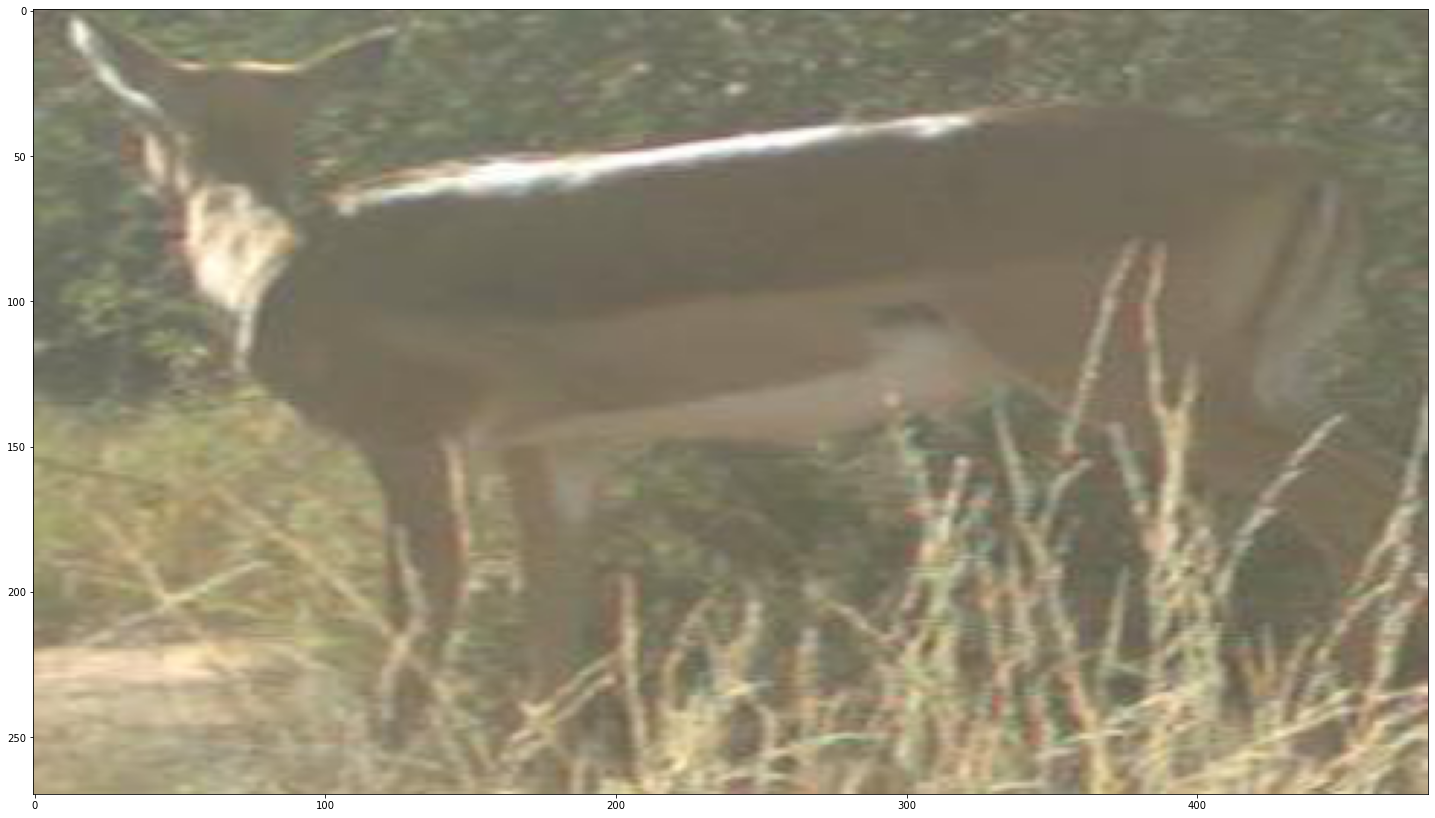

In [19]:
fig = plt.figure(figsize=(25, 16))

#ax = fig.add_subplot(1, 1, 0, xticks=[b], yticks=[])
im = Image.open(PATH + filename)
im = im.resize((480,270))
plt.imshow(im)
filename